# Problem set 3

Emily Ernst

Environmental Health and Quality of Life for US Americans in 2022

03 March, 2024

In [1]:
//loading in the GSS 2022 dataset
set more off 
use "/Users/emilyernst/Desktop/garden/GSS2022/GSS2022.dta" , clear

In [2]:
ds physhlth realinc hrs1

physhlth  realinc   hrs1


## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
    H1: The dependent variable physhlth (days of poor health experienced in the past 30 days) will have a negative association 
        with the amount of a respondent's income. 
    
    H2: There will be a positive relationship between the amount of hours worked last week with those who agree they experience 
        poor health due to their surrounding environments.
        

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. 
    sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you 
    think your hypothesized relationships will or will not take.
    
    I hypothesizenthat H1 will be a non-linear logarhythmic relationship.
    I hypothesize H2 will have a non-linear, spline relationship.

    C. State your explanation why (theory) you make the predictions in A. and B.
    
    I think H1 will have a non-linear relationship where higher income will gradually affect less and less because  of what was 
    discussed in class; income typically tends to have a gradual plateau in effect. 
    
    I hypothesize that H2 will have a spline relationship, where the magnitude of the amount of days of poor health will 
    increase after 40 hours of work per week. I'm making this guess becaue those who work in rural and agricultural 
    fields as well as other manual labor positions are most exposed to the conditions that would cause poor health, which are 
    positions that people often work over 40 hours in per week. 
  

    D. Tell us the source of your data and describe its sample.
    
    This is a secondary data source, nationally representative cross-sectional data from the GSS 2022 year ballot. The sample 
    is a random sample of U.S. Adults. 

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [15]:
//H1. Log relationship
//DV: physhlth IV: realinc
*Note: Since this is a log-INDEPENDENT model, we are transforming the INDEPENDENT variable in this.

gen loggedincome=log10(realinc)

(434 missing values generated)


In [33]:
reg physhlth loggedincome 


      Source |       SS           df       MS      Number of obs   =     1,755
-------------+----------------------------------   F(1, 1753)      =     18.79
       Model |  712.182901         1  712.182901   Prob > F        =    0.0000
    Residual |  66443.8251     1,753  37.9029236   R-squared       =    0.0106
-------------+----------------------------------   Adj R-squared   =    0.0100
       Total |   67156.008     1,754  38.2873478   Root MSE        =    6.1565

------------------------------------------------------------------------------
    physhlth | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
loggedincome |  -1.468818   .3388509    -4.33   0.000    -2.133413   -.8042239
       _cons |   9.342063   1.525526     6.12   0.000     6.350021     12.3341
------------------------------------------------------------------------------


In [50]:
predict yhat2
replace yhat2=10^(yhat2)

*Creating fitted line for regular linear model
quietly reg physhlth realrinc
predict yhat3, xb

variable yhat2 already defined
r(110);


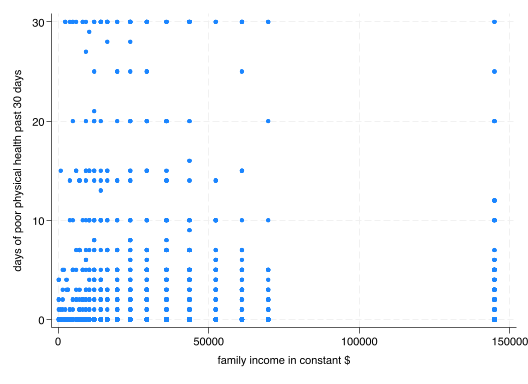

In [51]:
tw (scatter physhlth realinc) 

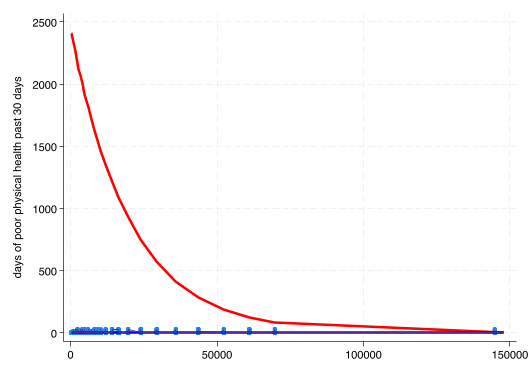

In [53]:
tw (scatter physhlth realinc) ///
(line yhat2 physhlth realrinc, sort color(red) lwidth(thick)) ///
(line yhat3 physhlth realrinc, sort color(blue) lwidth(thick)), legend(off)

In [59]:
//regress with and without log
**Created a logged income variable
gen realrinc_nl=log(realrinc)


variable realrinc_nl already defined
r(110);


In [60]:
*regress the unlogged and logged income variable (DV) on education (IV) and compare

qui est clear

**Regress w/o logging
qui eststo: reg physhlth realrinc 

** Predict Y-hat based on the above


In [65]:
*regression
qui predict yhat5, xb

variable yhat5 already defined
r(110);


In [66]:
**Regress logged Y on education
qui eststo: reg physhlth realrinc_nl 

** Predict logged Y-hat based on the above regression
predict yhatln

(option xb assumed; fitted values)
(1,554 missing values generated)


In [67]:
eststo: reg physhlth realrinc_nl


      Source |       SS           df       MS      Number of obs   =     1,615
-------------+----------------------------------   F(1, 1613)      =     24.08
       Model |  886.010172         1  886.010172   Prob > F        =    0.0000
    Residual |  59345.9254     1,613  36.7922662   R-squared       =    0.0147
-------------+----------------------------------   Adj R-squared   =    0.0141
       Total |  60231.9356     1,614  37.3184235   Root MSE        =    6.0657

------------------------------------------------------------------------------
    physhlth | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 realrinc_nl |  -.6959129   .1418123    -4.91   0.000    -.9740685   -.4177572
       _cons |   9.594279    1.40904     6.81   0.000     6.830537    12.35802
------------------------------------------------------------------------------
(est3 stored)


In [68]:
%head physhlth yhat yhatln realrinc if _n<6

,physhlth,yhat,yhatln,realrinc
1,,2.339495,2.159972,43600
2,iap,.,.,.
3,,2.177369,2.715664,19620
4,,.,4.178413,2398
5,iap,.,.,.


In [69]:
**Then exponentiate 
replace yhatln=10^(yhatln)

**Print estimates from both models
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase

(1,990 real changes made)

------------------------------------------------------------
                      (1)             (2)             (3)   
                 physhlth        physhlth        physhlth   
                     b/se            b/se            b/se   
------------------------------------------------------------
realrinc           -0.000***                                
                  (0.000)                                   
realrinc_nl                        -0.696***       -0.696***
                                  (0.142)         (0.142)   
_cons               3.386***        9.594***        9.594***
                  (0.206)         (1.409)         (1.409)   
------------------------------------------------------------
R-Sqaured           0.014           0.015           0.015   
N                1615.000        1615.000        1615.000   
------------------------------------------------------------


In [ ]:
**uhmmm

In [ ]:
** The models look.. similar, in the sense that I think I'm doing something wrong. When graphed, it seems that the logged ///
** model is better.. but when comparing p-values, r-squared, f values everything looks pretty much the same? 

In [3]:
//H2. Spline relationship
//DV: physhlth IV: hrs1 

sum physhlth hrs1, detail


          days of poor physical health past 30 days
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,922
25%            0              0       Sum of wgt.       1,922

50%            0                      Mean           2.741415
                        Largest       Std. dev.       6.20022
75%            2             30
90%            8             30       Variance       38.44273
95%           15             30       Skewness       3.168323
99%           30             30       Kurtosis       13.02458

              number of hours worked last week
-------------------------------------------------------------
      Percentiles      Smallest
 1%            1              0
 5%           15              0
10%           20              0       Obs               1,938
25%           37              0       Sum of wgt.     

In [4]:
xtile hrsquant= hrs1, nq(4)
*I am creating a new variable here (called hrsquant) that will consist of quantiles for the amount of hours worked last week

*I specified that I want 4 quantiles for this variable with the option "nq(4)"

*4 quantile means that there would be these categories:
    * 1 = 0-25% percentile
    * 2 = 25-50% percentile
    * 3 = 50-75% percentile
    * 4 = 75-100% percentile

In [5]:
codebook hrsquant


-------------------------------------------------------------------------------
hrsquant                                                    4 quantiles of hrs1
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 1,606/3,544

            Tabulation: Freq.  Value
                          495  1
                          802  2
                          181  3
                          460  4
                        1,606  .


In [6]:
tab hrsquant


4 quantiles |
    of hrs1 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        495       25.54       25.54
          2 |        802       41.38       66.92
          3 |        181        9.34       76.26
          4 |        460       23.74      100.00
------------+-----------------------------------
      Total |      1,938      100.00


In [7]:
sum hrs1, detail
tab hrsquant


              number of hours worked last week
-------------------------------------------------------------
      Percentiles      Smallest
 1%            1              0
 5%           15              0
10%           20              0       Obs               1,938
25%           37              0       Sum of wgt.       1,938

50%           40                      Mean           40.18163
                        Largest       Std. dev.      14.10734
75%           45             89
90%           55             89       Variance       199.0171
95%           60             89       Skewness       .0541253
99%           82             89       Kurtosis       4.829227

4 quantiles |
    of hrs1 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        495       25.54       25.54
          2 |        802       41.38       66.92
          3 |        181        9.34       76.26
          4 |        460       23.74      100.00
------------+-----

In [8]:
%head physhlth hrs1 hrsquant

,physhlth,hrs1,hrsquant
1,,,2
2,iap,iap,.
3,,,4
4,,iap,.
5,iap,iap,.


In [9]:
*I believe there is one knot, and that occurs in the middle quantile (2nd quantile)
    *getting the average/mean for hours worked/week that fall into the 2nd quantile

sum hrs1 if hrsquant==2


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        hrs1 |        802    39.93766    .3405269         38         40


In [10]:
*making the spline variables

mkspline hrsworked2 39.93766 hrsworked3= hrs1

(bin=32, start=0, width=1.2480519)


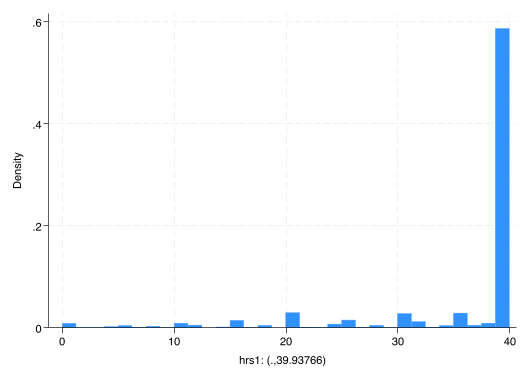

In [11]:
histogram hrsworked2, name(hist1)

(bin=32, start=0, width=1.5331981)


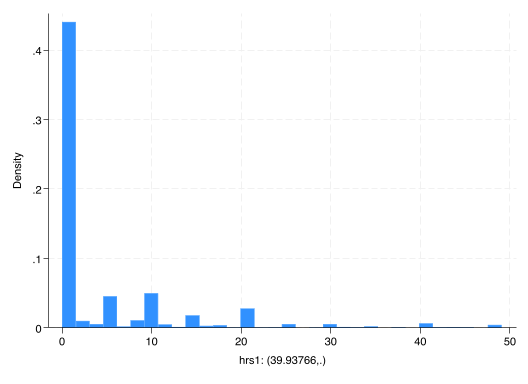

In [12]:
histogram hrsworked3, name(hist2)


      Source |       SS           df       MS      Number of obs   =     1,828
-------------+----------------------------------   F(2, 1825)      =      6.42
       Model |  424.944693         2  212.472347   Prob > F        =    0.0017
    Residual |  60419.8781     1,825  33.1067825   R-squared       =    0.0070
-------------+----------------------------------   Adj R-squared   =    0.0059
       Total |  60844.8228     1,827  33.3031323   Root MSE        =    5.7538

------------------------------------------------------------------------------
    physhlth | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  hrsworked2 |  -.0485746   .0154399    -3.15   0.002    -.0788562   -.0182929
  hrsworked3 |  -.0135105   .0154424    -0.87   0.382    -.0437971    .0167761
       _cons |   4.280292   .5524591     7.75   0.000     3.196774    5.363811
--------------------------------------------------

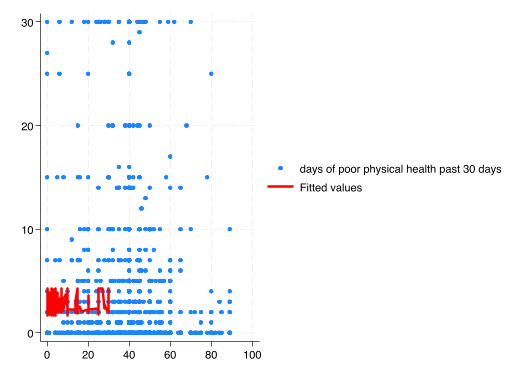

In [13]:
*Now let's run the regression output for this spline model and examine the graph for it

reg physhlth hrsworked2 hrsworked3
predict yhat


*Graph the fited spline lines for college net price
tw (scatter physhlth hrs1) (line yhat physhlth, sort color(red) lwidth(thick))

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    B. Say whether a linear or particular non-linear model best describes your data and why

A. (I think*) The results show some support my first hypothesis, since the exponentiated factor shows a negative correlation, and the log model shows that days of poor health experienced gradually decline with increasing income. However, it does not seem there is any support from the models ran for my second hypothesis seeing as the spline model does not represent my data and the coefficients are small and not positive.

B.
H1: Non-linear log model: 
Eyeballing this model, it appears that this log model is a great fit for my data. I then exponentiate the estimated coefficients by 10 since I did a log of 10. As a result of exponentiating the estimated coefficient by 10, I receive the multiplicative factor for every one-unit increase in the coefficient of income in dollars by 10.

-1.468818 becomes 10^(-1.468818), which is equal to approximately -0.034

My interpretation: For every one unit increase in income, days of poor health experienced in a month decreases by a factor of 0.03%. 

I would say that this model best supports my data because it represents the gradual decline of poor health days with increasing income, and begins to plateau, at that point fitting the linear model. Thus, it is more representative of the pattern in the data.


H2: Non-linear spline model: 
This model appears be conveying a cryptic message to me, but let's just say, it's hard to interpret what it says. If I had to guess what it was telling me, it's that this model is inappropriate for modeling the relationship between days of poor physical health and hours worked. We have a very small R-squared for the spline model, representing that the model is not representative of what's going on in the data. The p values are less than 0.05 indicating confidence in our beta coefficients, however, there is little confidence in whether or not the variation in physical health is epxlained by the amount of hours someone worked that week. 